# Logistic Regression

### Import Relevant Libraries

In [103]:
import numpy as np
# import matplotlib.pyplot as plt

Import Iris Dataset

In [104]:
# your code
from sklearn import datasets
iris = datasets.load_iris()

Select petal width as feature dataset (X) and output y # 1 if Iris virginica, else 0

In [105]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [106]:
X = iris['data'].transpose()[3]
Y = iris.target
Y = np.where(Y ==1,0,Y)
Y = np.where(Y ==2,1,Y)

## Import Logistic Regression from sklearn and train

Set solver="lbfgs" and random_state=42

In [107]:
# your code
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/10)
clf = LogisticRegression(solver= 'lbfgs',random_state=42).fit(X.reshape(-1, 1), Y)


Use linspace to create a data set from 0 to 3 with 1000 points

Predict using this new data

Plot both probability (Y[:, 0], Y[:, 1]) the first blue with dashes and the second as a green continous line

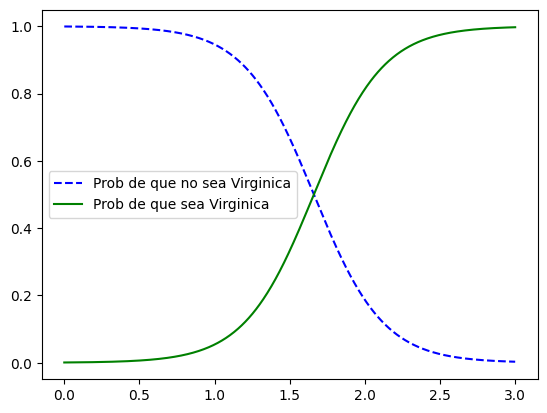

In [108]:
# your code
import numpy as np
import matplotlib.pyplot as plt
x_aux = np.linspace(0,3,1000)
y_pred = clf.predict_proba(x_aux.reshape(-1, 1))
plt.figure()
plt.plot(x_aux,y_pred.transpose()[0],'--',c = 'b')
plt.plot(x_aux,y_pred.transpose()[1],c='g')
plt.legend(['Prob de que no sea Virginica','Prob de que sea Virginica'])
plt.show()


Calculate the decision boundry (x value) if the threshold is set at y[:, 1] > 0.5

In [109]:
# your code
#De decision boundary es cuando ambas cosas obtiene el mismo valor
ubicacion_d_boundry = np.where(y_pred.transpose()[1]>0.5)[0][0]
x_d_boundry = x_aux[ubicacion_d_boundry]
x_d_boundry

1.6606606606606606

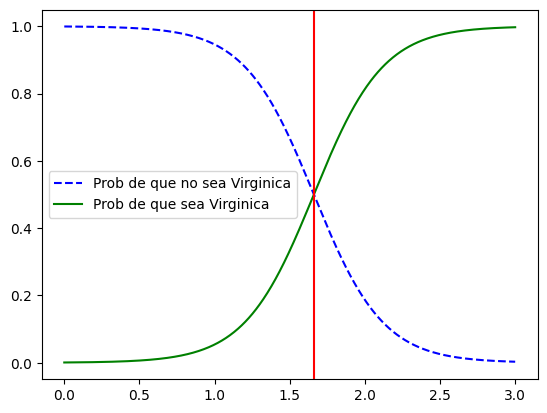

In [110]:
plt.figure()
plt.plot(x_aux,y_pred.transpose()[0],'--',c = 'b')
plt.plot(x_aux,y_pred.transpose()[1],c='g')
plt.axvline(x_d_boundry,color = 'r')
plt.legend(['Prob de que no sea Virginica','Prob de que sea Virginica'])
plt.show()

Predict a new data point [1.7, 1.5]

In [111]:
# your code
n_p = np.array([1.7,1.5])
y_pred_n_p = clf.predict(n_p.reshape(-1, 1))
y_pred_n_p

array([1, 0])

## Softmax Regression

Train the Logistic regression now with softmax 

Use now petal length, petal width as feature dataset(X)

Use solver="lbfgs", C=10**10, random_state=42

In [112]:
# # # your code
X = iris.data.T[2:]#.tranpose()[3:]
clf2 = LogisticRegression(multi_class='multinomial',solver= 'lbfgs',random_state=42)
#.fit(X, Y)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X.T, Y, test_size = 1/10)
clf2.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

Predict new data

In [114]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = clf2.predict_proba(X_new)

Plot y==0 as "bs" and y==1 as "g^"

In [115]:
predic = [np.argmax(i) for i in y_proba]
predic = np.array(predic)

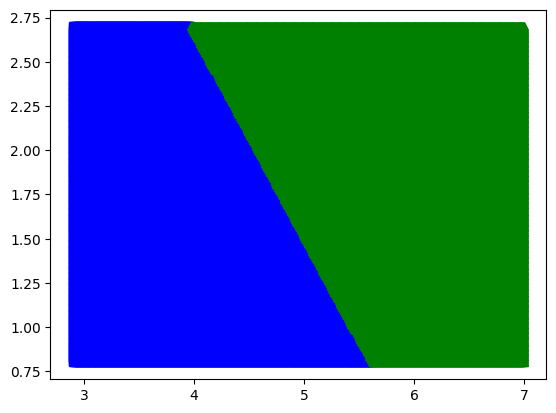

In [116]:
# x_cero = np.where(predic ==0)
# x_unos = np.where(predic == 1)
# x_dos = np.where(predic == 2)
plt.figure()
plt.plot(X_new.T[0][predic ==0], X_new.T[1][predic ==0],'bs')
plt.plot(X_new.T[0][predic ==1], X_new.T[1][predic ==1],'g^')
# plt.plot(X_new.T[0][predic ==2], X_new.T[1][predic ==2],'r')
plt.show()
# plt.plot(x_unos,y_uno,'g^')

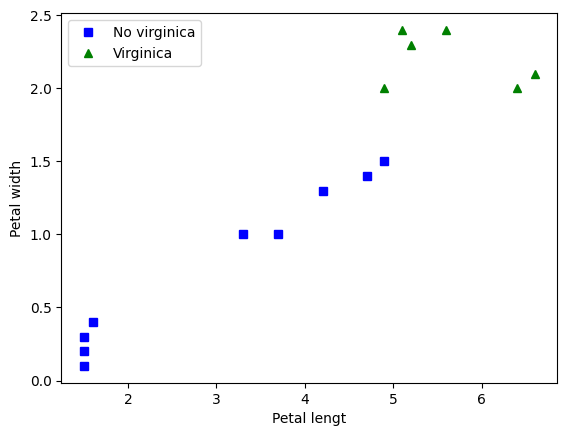

In [133]:
y_test_predic = clf2.predict_proba(X_test)
predic_test_2 = np.array([np.argmax(i) for i in y_test_predic])

plt.figure()
plt.plot(X_test.T[0][predic_test_2 ==0], X_test.T[1][predic_test_2 ==0],'bs')
plt.plot(X_test.T[0][predic_test_2 ==1], X_test.T[1][predic_test_2 ==1],'g^')
plt.legend(['No virginica','Virginica'])
plt.ylabel('Petal width')
plt.xlabel('Petal lengt')
plt.show()

Train multiclass Logistic Regression

Use now petal length, petal width as feature dataset(X)

Use now the iris target (all the classes) as output(y)

Use multi_class="multinomial",solver="lbfgs", C=10, random_state=42

In [134]:
# your code
X = iris.data.T[2:]
Y = iris.target

Calculate the probability and the prediction of the new data set 

In [138]:
clf3 = LogisticRegression(multi_class='multinomial',solver= 'lbfgs',random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X.T, Y, test_size = 1/10)
clf3.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [139]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

#your code
y_pred3 = clf3.predict_proba(X_new)


Plot the new dataset y==2 as "g^", y==1 as "bs", and y==0 as "yo"

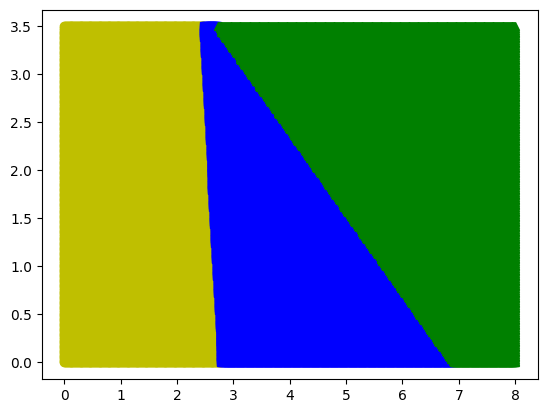

In [140]:
# your code
x0 = X_new.T[0]
x1 = X_new.T[1]
y_resul3 = [np.argmax(i) for i in y_pred3]
y_resul3 = np.array(y_resul3)
plt.figure()
plt.plot(x0[y_resul3==0],x1[y_resul3==0],'yo') #
plt.plot(x0[y_resul3==1],x1[y_resul3==1],'bs') #
plt.plot(x0[y_resul3==2],x1[y_resul3==2],'g^') # 
plt.show()


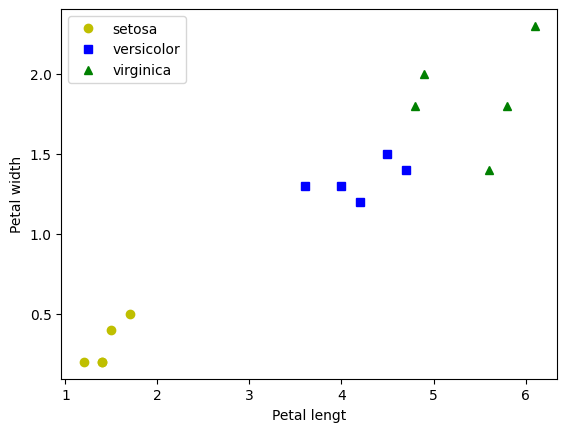

In [144]:
y_test_predic3 = clf3.predict_proba(X_test)
predic_test_3 = np.array([np.argmax(i) for i in y_test_predic3])

plt.figure()
plt.plot(X_test.T[0][predic_test_3 ==0], X_test.T[1][predic_test_3 ==0],'yo')
plt.plot(X_test.T[0][predic_test_3 ==1], X_test.T[1][predic_test_3 ==1],'bs')
plt.plot(X_test.T[0][predic_test_3 ==2], X_test.T[1][predic_test_3 ==2],'g^')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.ylabel('Petal width')
plt.xlabel('Petal lengt')
plt.show()

Predict a new point [5, 2]

In [122]:
# your code
X = [[5,2]]
y_pred_cincodos = clf3.predict_proba(X)

Show the probability of the new data point [5, 2]

In [123]:
# your code
y_pred_cincodos

array([[2.43559894e-04, 2.14859516e-01, 7.84896924e-01]])

In [124]:
np.argmax(y_pred_cincodos)

2